In [63]:
#Panda & Visualiztion Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn.cluster import KMeans
import re
sns.set()
%matplotlib inline
#Sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, precision_score, accuracy_score
from sklearn.metrics import recall_score, classification_report, f1_score, roc_curve, auc

In [64]:
data = pd.read_csv('train.csv')
train = data.copy()

data = pd.read_csv('test.csv')
test = data.copy()

data = pd.read_csv('store.csv')
store = data.copy()

C:\Users\Howlingwolfs\AppData\Local\Temp\ipykernel_2984\1451732182.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [67]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Merging Data

In [68]:
train = pd.merge(train, store, on='Store', how='outer')
test = pd.merge(test, store, on='Store', how='outer')

In [69]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

### Checking for duplicate data

In [71]:
train.duplicated().sum()

np.int64(0)

### Checking for missing data

In [72]:
train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

### Ploting the graph for missing data

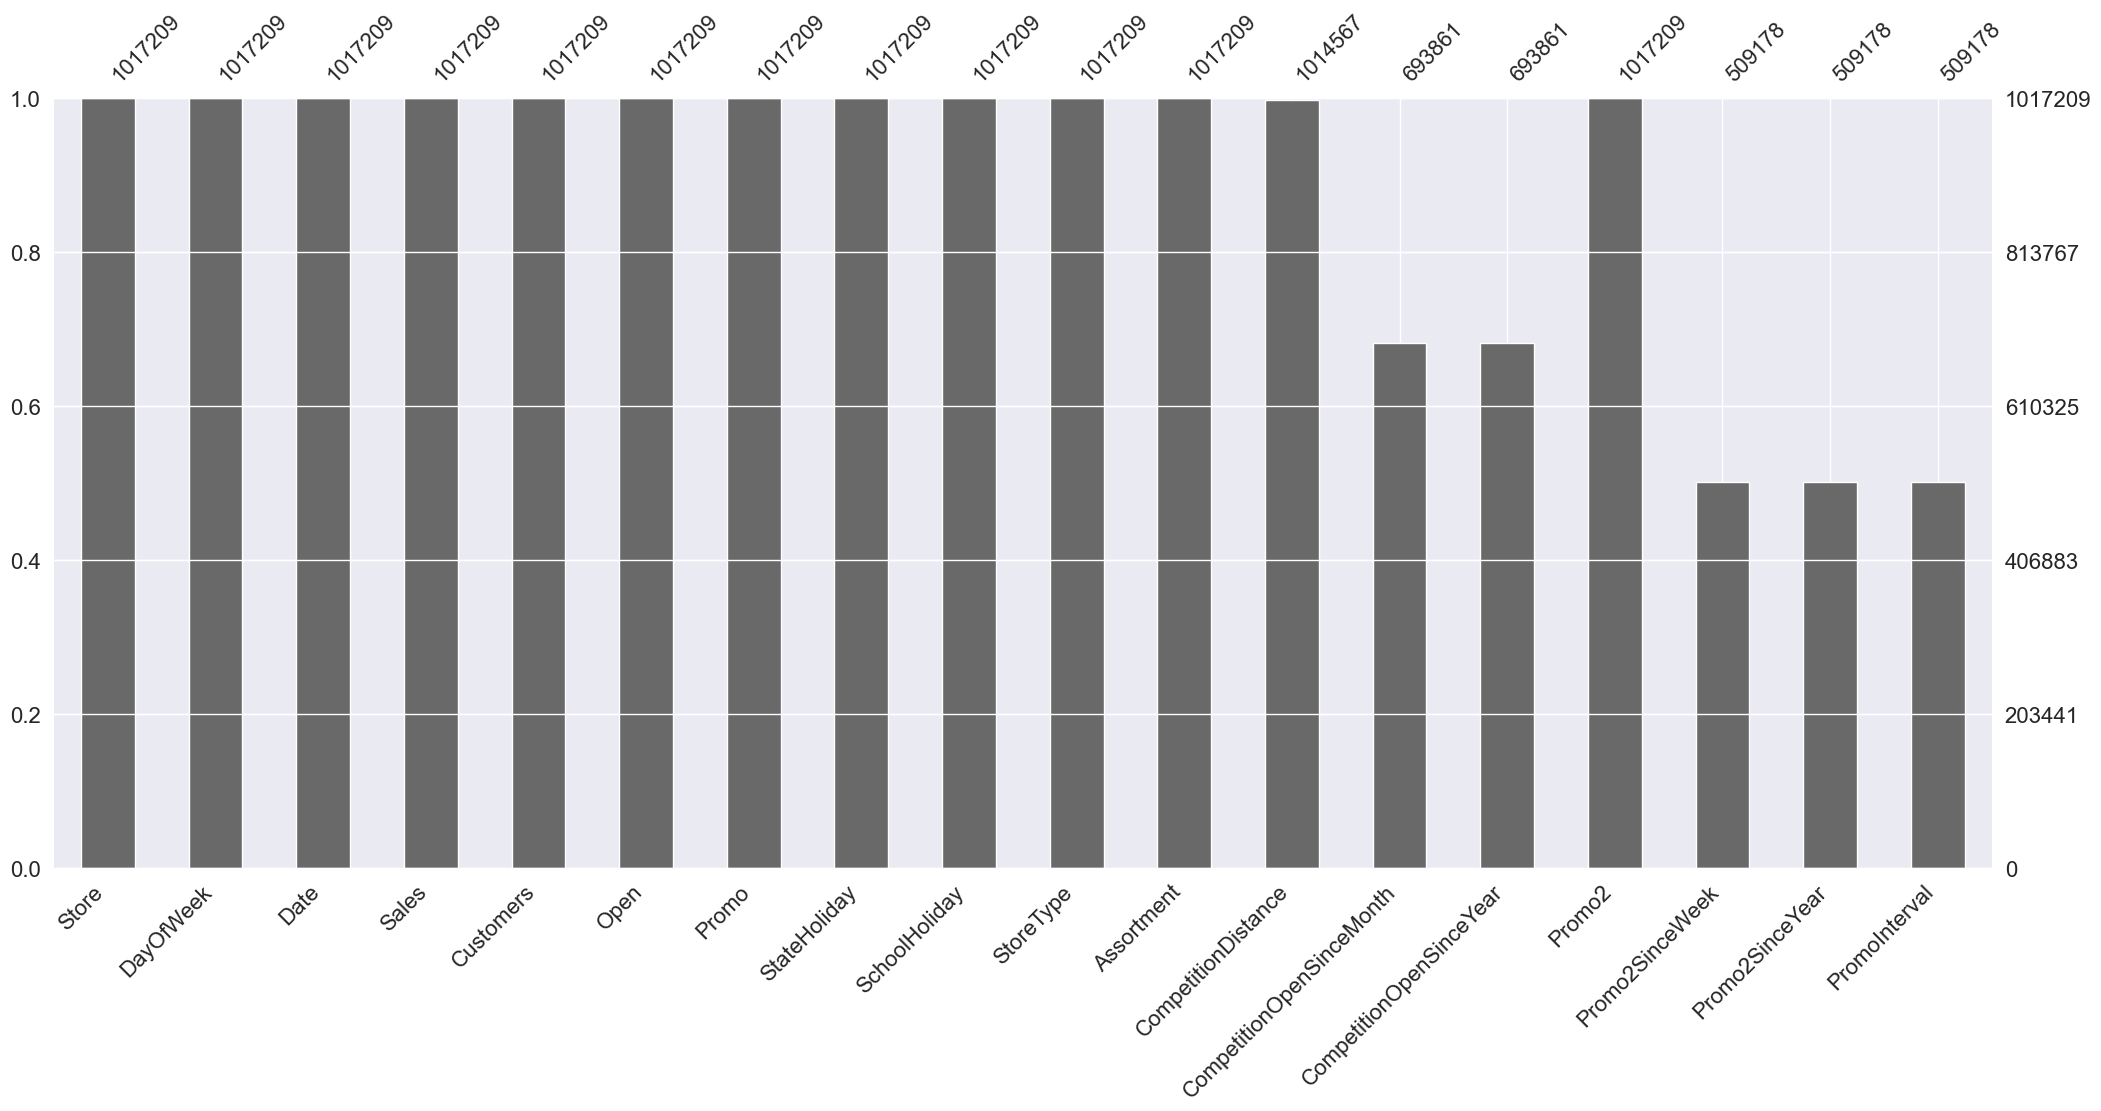

In [73]:
mno.bar(train)
plt.show()

#### Checking column "CompetitionDistance".
As you can see that there are outliers in this column

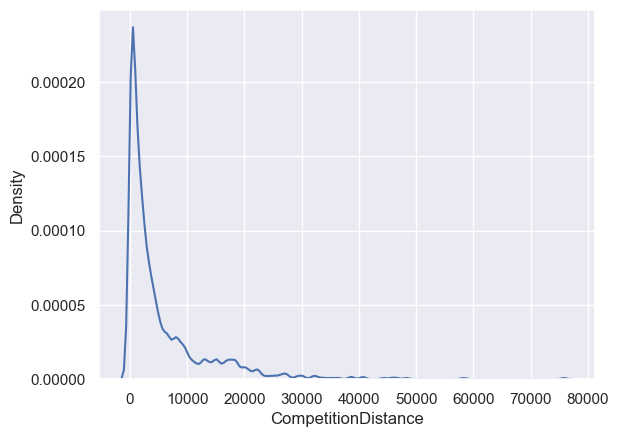

In [74]:
sns.kdeplot(train['CompetitionDistance'])
plt.show()

#### Checking skew
To replace the missing values (impute) with either the <b>mean</b> or <b>median</b> of the column we see how the data is distributed.
* <b>Mean</b> Best when data is <b>normally distributed</b>(no big outliers) - if <b>skewness is close to 0</b>
* <b>Madian</b> Best when data is <b>skewed</b> or has <b>outliers</b> - if <b>skewness is far from 0 (e.g., >1 or <-1)</b>
As you can see the skewness is greater than 1 so we use median

In [75]:
train['CompetitionDistance'].skew()

np.float64(2.9285340174784116)

In [76]:
train['CompetitionDistance'].median()

2330.0

#### Filling the data with median

In [77]:
train['CompetitionDistance'] = train['CompetitionDistance'].fillna(train['CompetitionDistance'].median())

In [78]:
train['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

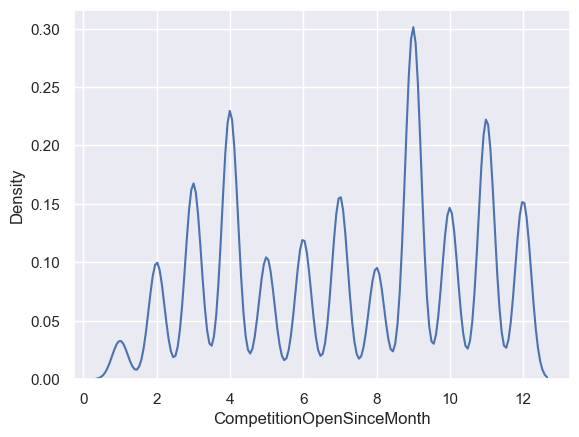

In [79]:
sns.kdeplot(train['CompetitionOpenSinceMonth'])
plt.show()

In [80]:
train['CompetitionOpenSinceMonth'].skew()

np.float64(-0.16986163462865858)

In [81]:
train['CompetitionOpenSinceMonth'].mean()

np.float64(7.222865963067531)

In [82]:
train['CompetitionOpenSinceMonth'] = train['CompetitionOpenSinceMonth'].fillna(7)

In [83]:
train['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [84]:
train['CompetitionOpenSinceYear'].skew()

np.float64(-7.5395148785892525)

In [85]:
train['CompetitionOpenSinceYear'].mean()

np.float64(2008.6902275816049)

In [86]:
train['CompetitionOpenSinceYear'] = train['CompetitionOpenSinceYear'].fillna(2008)

In [87]:
train['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [88]:
train['Promo2SinceWeek'].skew()

np.float64(0.1045275225517906)

In [89]:
train['Promo2SinceWeek'].mean()

np.float64(23.269092537383784)

In [90]:
train['Promo2SinceWeek'] = train['Promo2SinceWeek'].fillna(train['Promo2SinceWeek'].mean())

In [91]:
train['Promo2SinceYear'].unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [92]:
train['Promo2SinceYear'].skew()

np.float64(-0.12005991671486049)

In [93]:
train['Promo2SinceYear'].mean()

np.float64(2011.7527740790058)

In [94]:
train['Promo2SinceYear'] = train['Promo2SinceYear'].fillna(2011)

In [95]:
train['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [96]:
train['PromoInterval'].isnull().sum()/len(train['PromoInterval'])*100

np.float64(49.94362023930186)

In [97]:
train = train.drop('PromoInterval', axis=1)

In [98]:
train.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
dtype: int64

In [99]:
train.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
dtype: object

In [100]:
train['Date'] = pd.to_datetime(train.Date)

In [101]:
# train['Year'] = train['Date'].dt.year
train['Months'] = train['Date'].dt.month

In [102]:
train['Months_sin'] = np.sin(2 * np.pi * train['Months']/12)
train['Months_cos'] = np.cos(2 * np.pi * train['Months']/12)

In [103]:
train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [104]:
def to_num(col):
    if col == '0' or col == 0:
        return 0
    elif col == 'a':
        return 1
    elif col == 'b':
        return 2
    elif col == 'c':
        return 3

In [105]:
train['StateHoliday'] = train['StateHoliday'].apply(to_num)
train['StateHoliday'].unique()

array([0, 1, 2, 3])

In [106]:
le = LabelEncoder()

In [107]:
train['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [108]:
train['StoreType'] = le.fit_transform(train['StoreType'])

In [109]:
train['Assortment'] = le.fit_transform(train['Assortment'])

In [110]:
train.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
Months                                int32
Months_sin                          float64
Months_cos                          float64
dtype: object

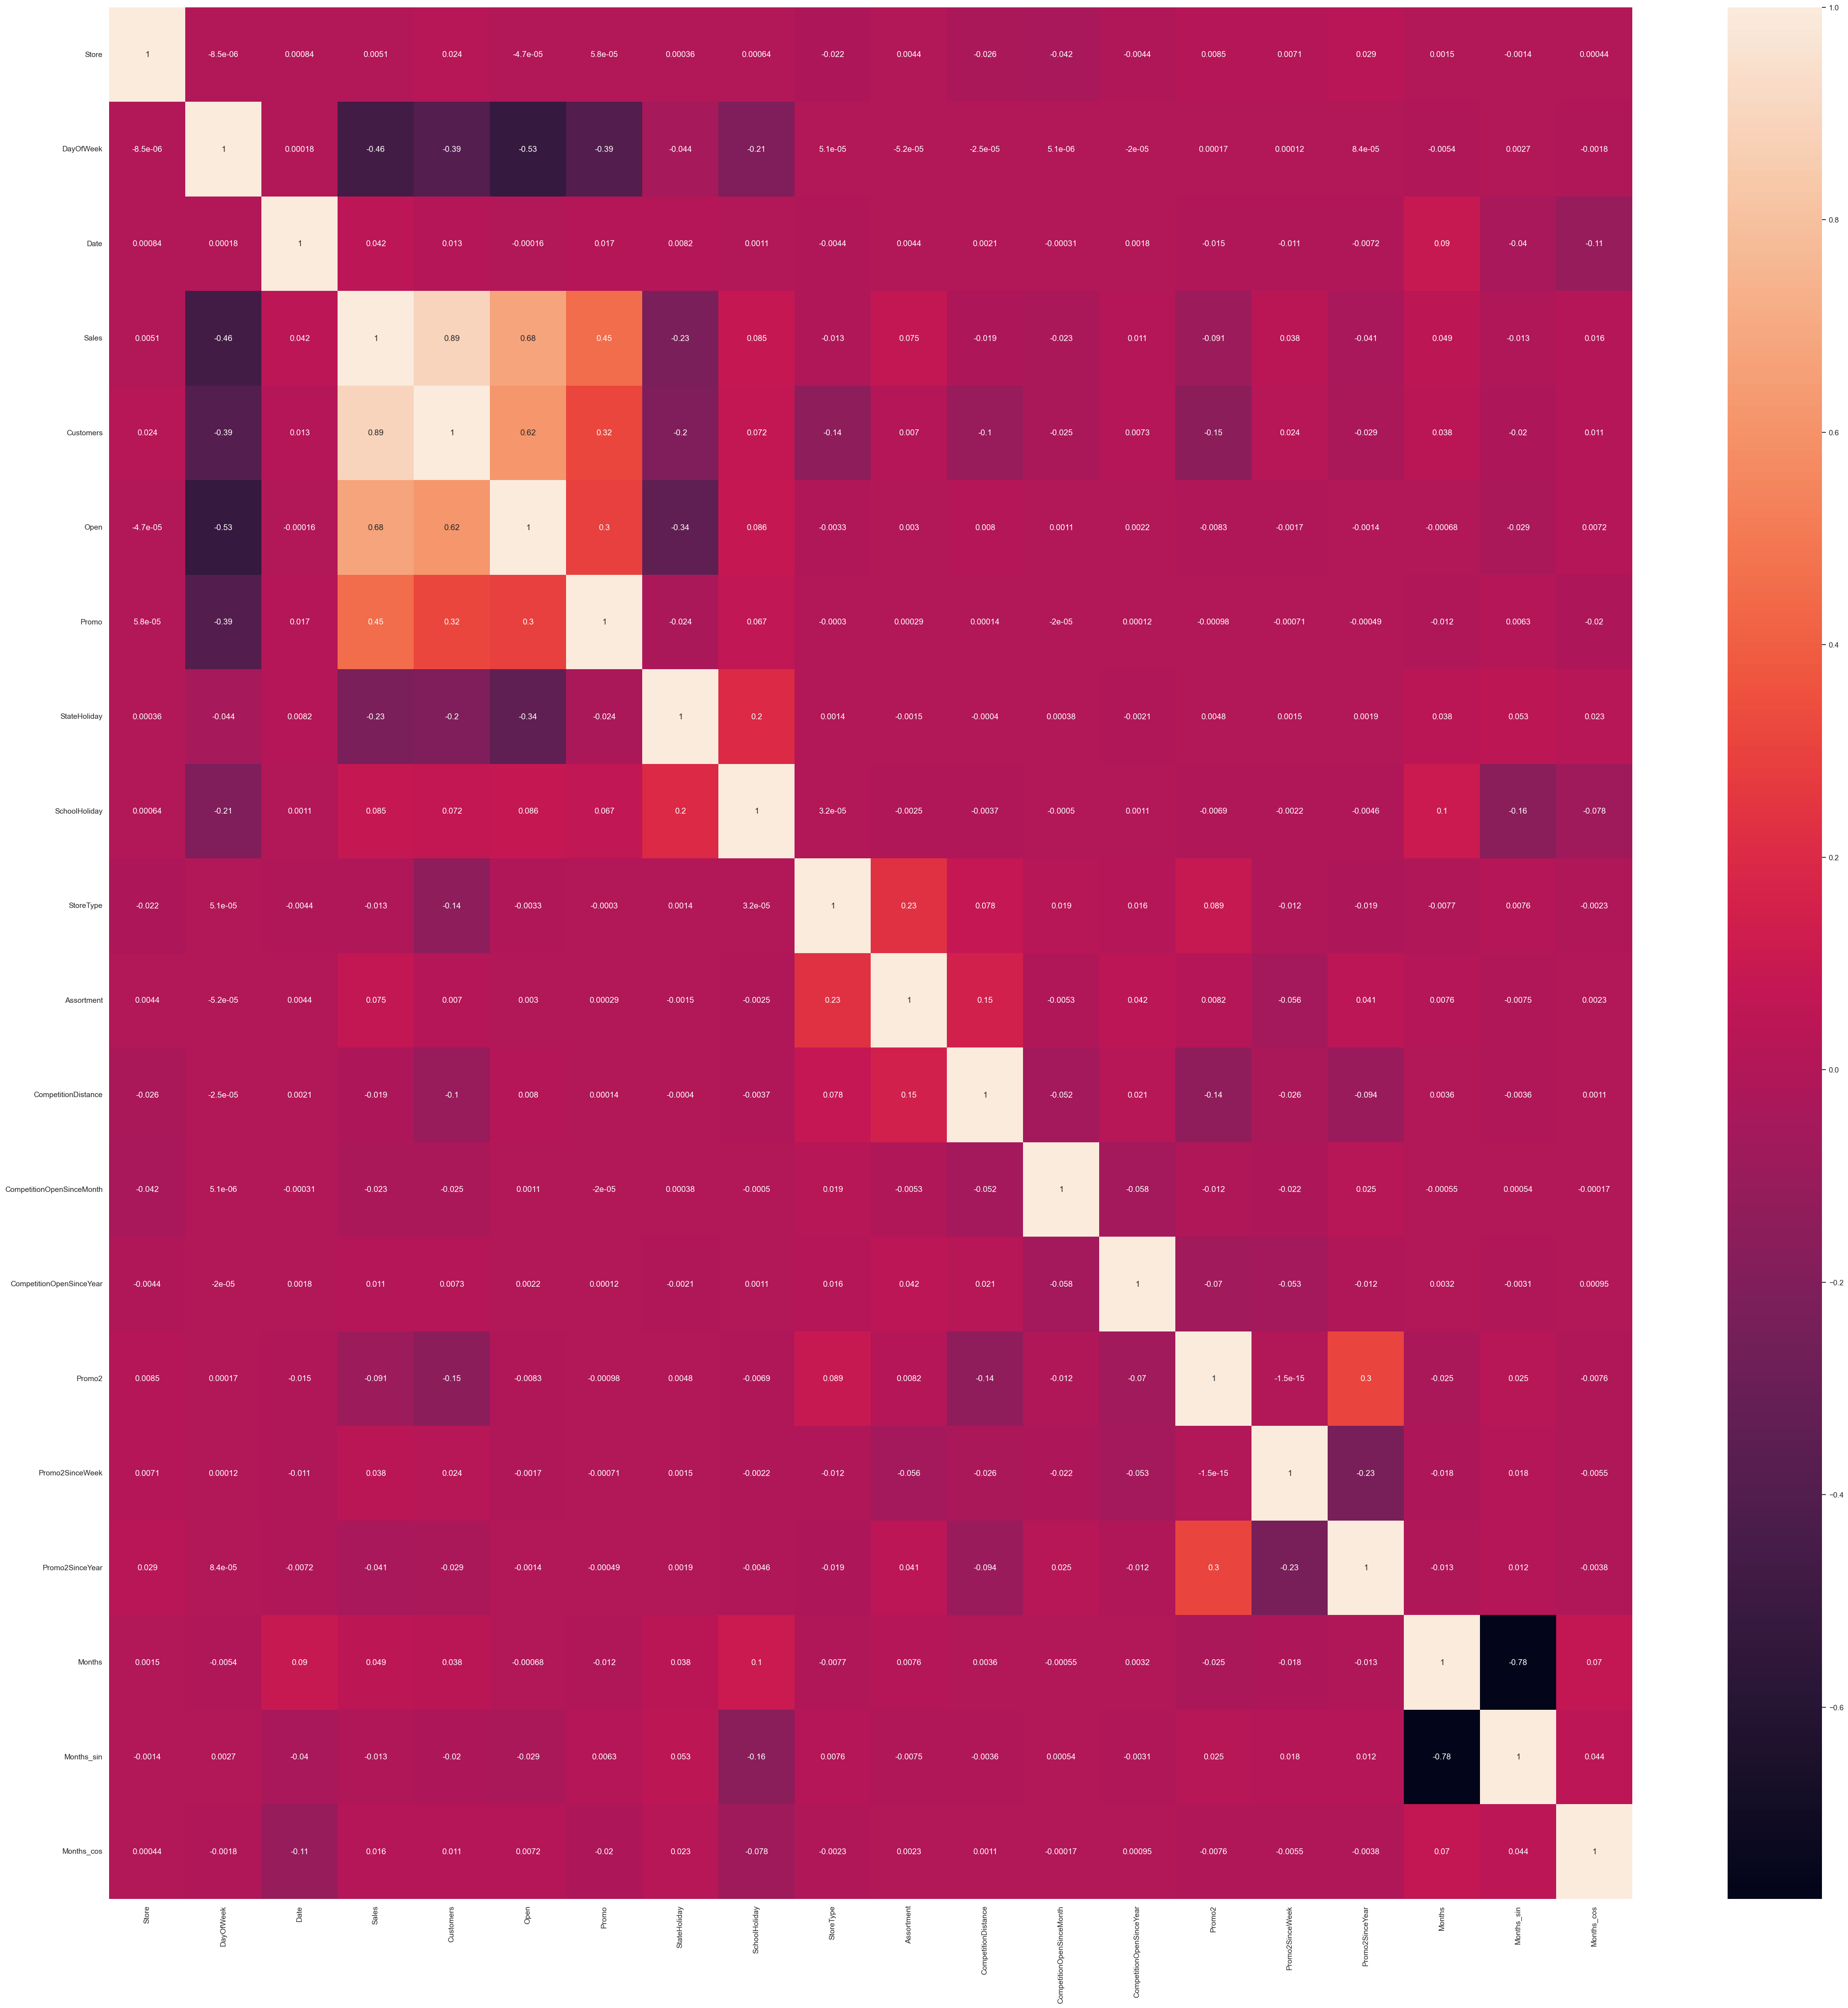

In [111]:
plt.figure(figsize=(50, 50))
cor = train.corr()
sns.heatmap(cor, annot=True);
plt.show()

In [112]:
X = train.drop(['Date', 'Months', 'Sales'], axis=1)
Y = train['Sales']

In [113]:
print(X.shape, Y.shape)

(1017209, 17) (1017209,)


In [114]:
scaler = StandardScaler()
scaler.fit(X)
X_ = scaler.transform(X)
X = pd.DataFrame(data=X_, columns = X.columns)
X.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Months_sin,Months_cos
0,-1.73164,0.501484,-0.168269,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.538742,0.696115,-0.094927,-1.001128,1.781172e-15,-0.305054,-0.902875,-1.11854
1,-1.73164,0.000831,-0.187648,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.538742,0.696115,-0.094927,-1.001128,1.781172e-15,-0.305054,-0.902875,-1.11854
2,-1.73164,-0.499823,-0.237173,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.538742,0.696115,-0.094927,-1.001128,1.781172e-15,-0.305054,-0.902875,-1.11854
3,-1.73164,-1.000476,-0.157502,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.538742,0.696115,-0.094927,-1.001128,1.781172e-15,-0.305054,-0.902875,-1.11854
4,-1.73164,-1.501129,-0.045533,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.538742,0.696115,-0.094927,-1.001128,1.781172e-15,-0.305054,-0.902875,-1.11854


In [115]:
xtrain ,xtest, ytrain, ytest = train_test_split(X.values, Y.values, test_size=0.25, random_state=12)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(762906, 17) (762906,)
(254303, 17) (254303,)


# Linear Regression

In [116]:
model = LinearRegression(fit_intercept=True, n_jobs =1)
model.fit(xtrain, ytrain)

LinearRegression(n_jobs=1)

In [117]:
pred_LinearRegression = model.predict(xtest)

In [118]:
def make_dataframe(pred, ytest, columns=5):
    pp = pred.tolist()
    ap = ytest.tolist()
    #pp = np.squeeze(pp, axis=1)
    #ap = np.squeeze(ap, axis=1)
    data = pd.DataFrame({
        'Predicted Price' : pp,
        'Actual Price' : ap
    })
    return data.head(columns)

In [119]:
make_dataframe(pred_LinearRegression, ytest)

,Predicted Price,Actual Price
0,8196.278034,6171
1,6134.370287,5338
2,7837.589347,7184
3,6872.423936,5929
4,10218.749332,9579


In [120]:
def plot_predictions(pred, ytest):
    sns.set_context('poster')
    plt.figure(figsize=(12,8))
    plt.plot(ytest[:100], label='original');
    plt.plot(pred[:100], label='prediciton');
    plt.legend();
    plt.show()

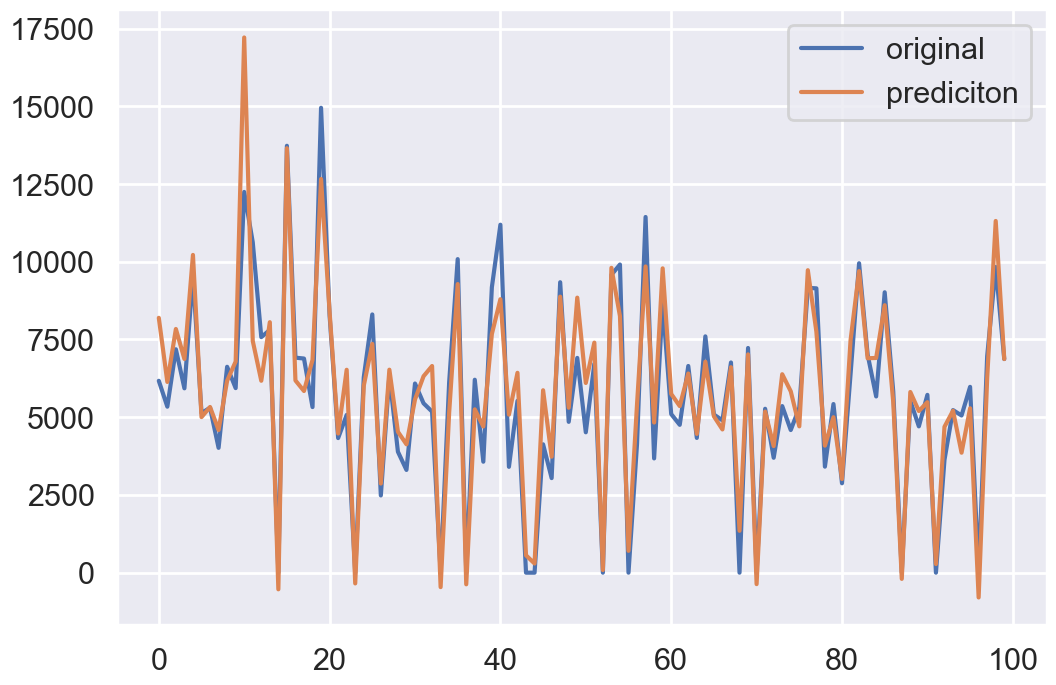

In [121]:
plot_predictions(pred_LinearRegression, ytest)

In [122]:
r2_LinearRegression = r2_score(pred_LinearRegression, ytest)
r2_LinearRegression

0.848148377638474

In [123]:
mse_LinearRegression = mean_squared_error(ytest, pred_LinearRegression)
mse_LinearRegression

1962126.859942282

# DecisionTreeRegressor

In [125]:
model = DecisionTreeRegressor(random_state=0)
model.fit(xtrain, ytrain)

DecisionTreeRegressor(random_state=0)

In [126]:
pred_DecisionTreeRegressor = model.predict(xtest)

In [127]:
make_dataframe(pred_DecisionTreeRegressor, ytest)

,Predicted Price,Actual Price
0,6322.0,6171
1,5479.0,5338
2,7996.0,7184
3,6533.0,5929
4,9217.0,9579


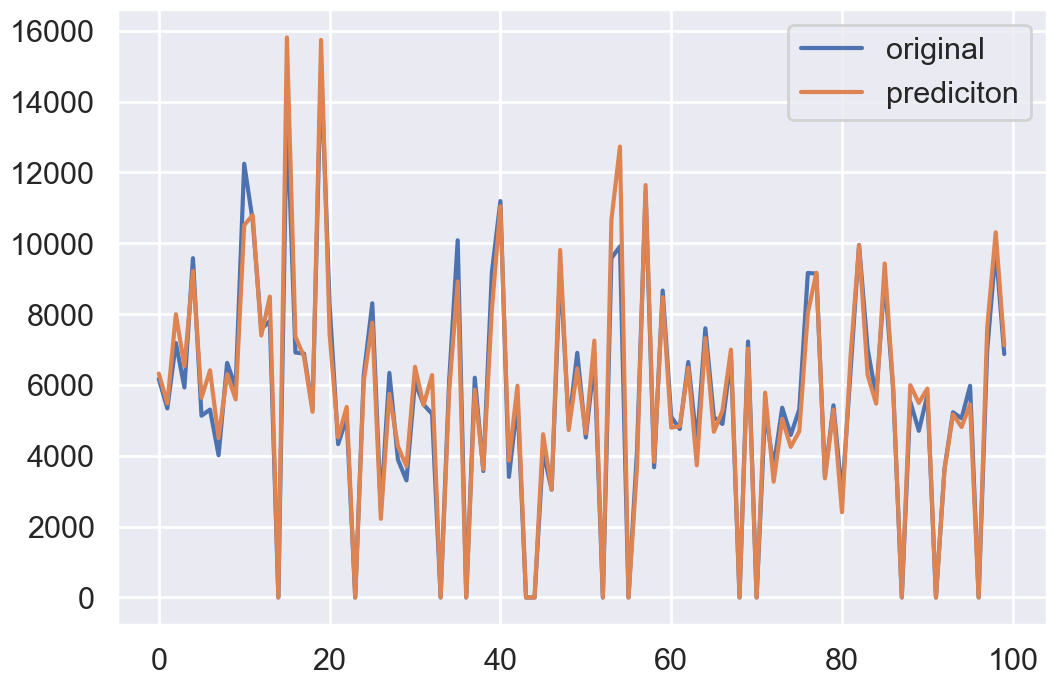

In [128]:
plot_predictions(pred_DecisionTreeRegressor, ytest)

In [129]:
r2_DecisionTreeRegressor = r2_score(pred_DecisionTreeRegressor, ytest)
r2_DecisionTreeRegressor

0.9719202365476307

In [130]:
mse_pred_DecisionTreeRegressor = mean_squared_error(ytest, pred_DecisionTreeRegressor)
mse_pred_DecisionTreeRegressor

416705.0367024988

In [131]:
features_tuple=list(zip(X.columns,model.feature_importances_))

In [132]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [133]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

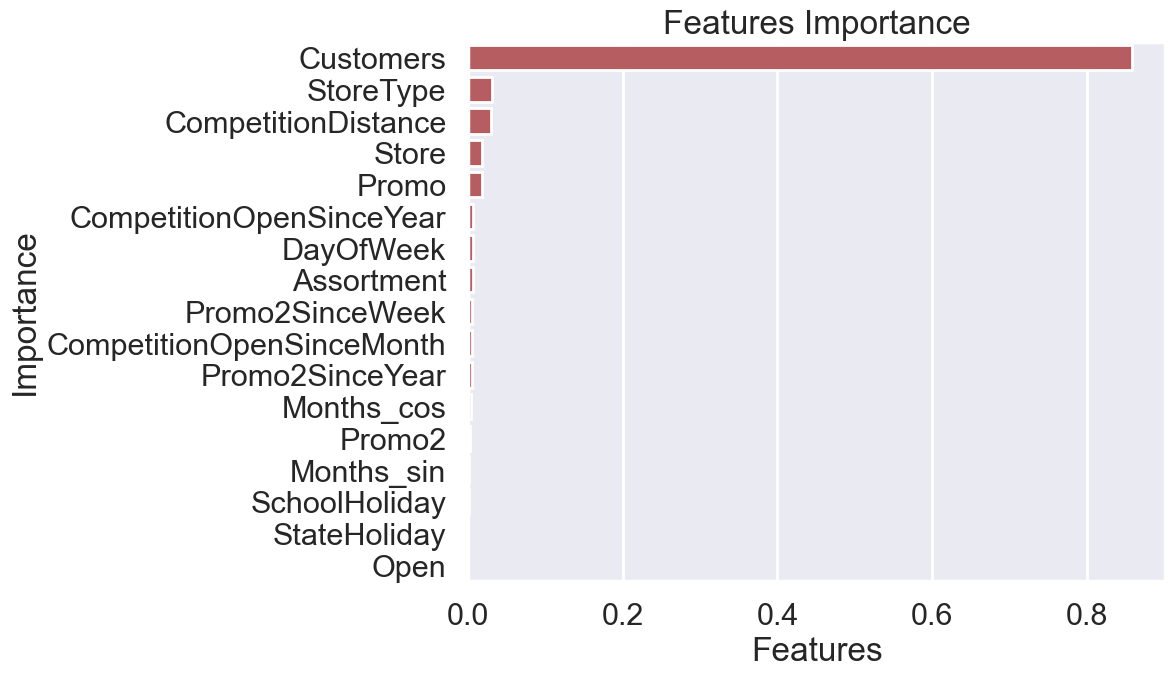

In [134]:
plt.figure(figsize=(9,7))
sns.barplot(y="Feature Names",x="Importance", data=feature_imp, color='r')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

# RandomForestRegressor

In [135]:
model = RandomForestRegressor(n_estimators=10, random_state=0)
model.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=10, random_state=0)

In [136]:
pred_RandomForestRegressor = model.predict(xtest)

In [137]:
make_dataframe(pred_RandomForestRegressor, ytest)

,Predicted Price,Actual Price
0,6627.6,6171
1,5560.3,5338
2,7930.1,7184
3,6633.0,5929
4,9540.8,9579


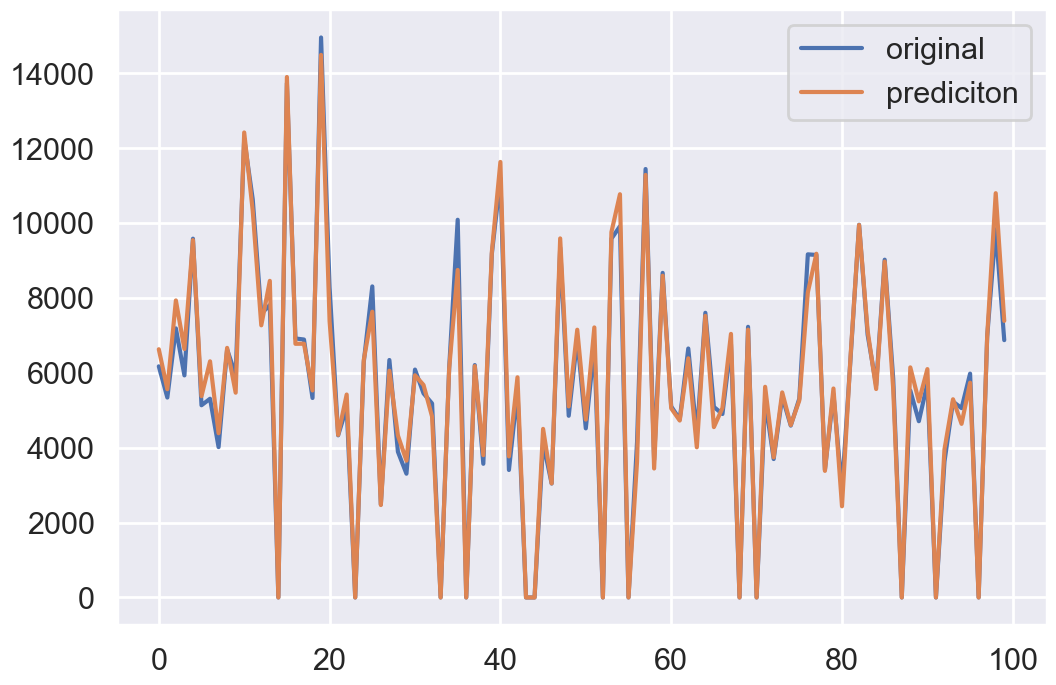

In [138]:
plot_predictions(pred_RandomForestRegressor, ytest)

In [139]:
r2_RandomForestRegressor = r2_score(pred_RandomForestRegressor, ytest)
r2_RandomForestRegressor

0.983190933246036

In [140]:
mse_RandomForestRegressor = mean_squared_error(ytest, pred_RandomForestRegressor)
mse_RandomForestRegressor

245802.45089488733

In [141]:
features_tuple=list(zip(X.columns,model.feature_importances_))
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])
feature_imp=feature_imp.sort_values("Importance",ascending=False)

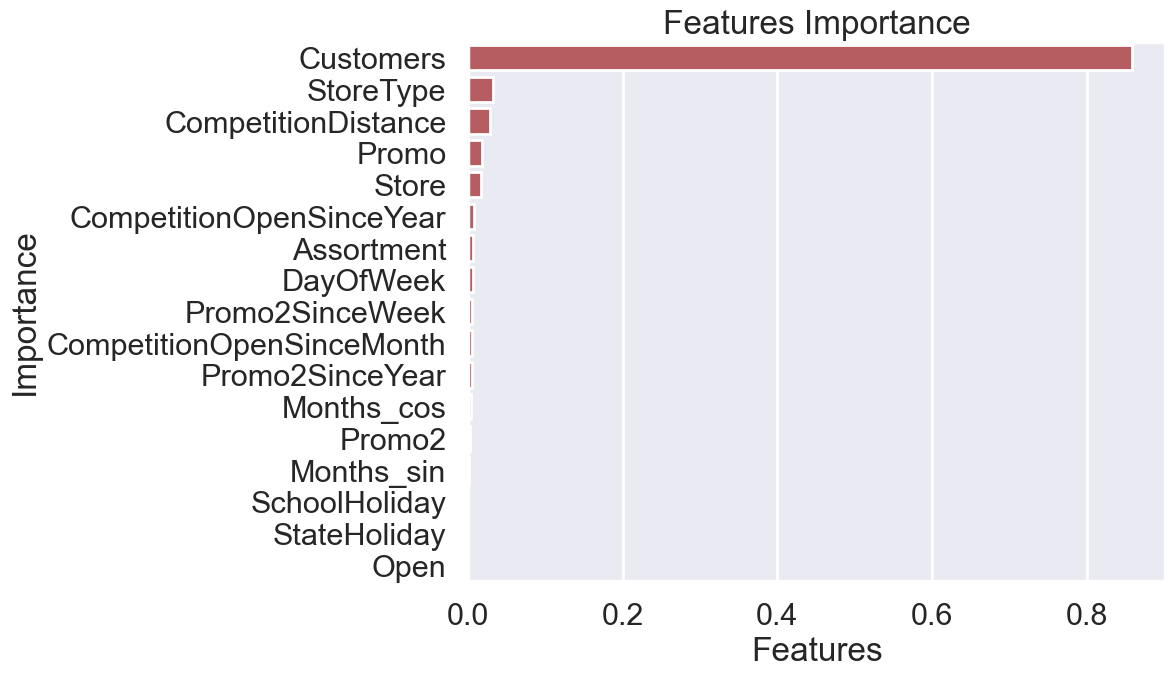

In [142]:
plt.figure(figsize=(9,7))
sns.barplot(y="Feature Names",x="Importance", data=feature_imp, color='r')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

# XGBRegressor

In [143]:
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.001,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
model.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.001, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=1.5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10000,
             n_jobs=None, num_parallel_tree=None, ...)

In [144]:
pred_XGBRegressor = model.predict(xtest)

In [145]:
make_dataframe(pred_XGBRegressor, ytest)

,Predicted Price,Actual Price
0,7757.848633,6171
1,5368.921387,5338
2,8409.335938,7184
3,6386.225098,5929
4,9656.575195,9579


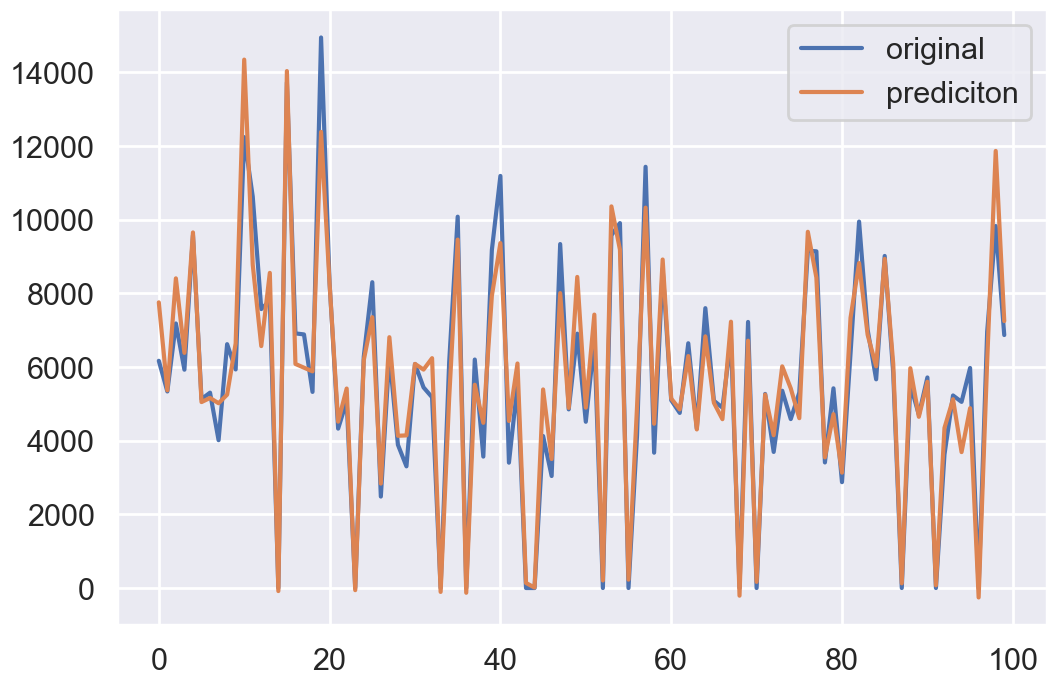

In [146]:
plot_predictions(pred_XGBRegressor, ytest)

In [147]:
r2_XGBRegressor = r2_score(pred_XGBRegressor, ytest)
r2_XGBRegressor

0.911116898059845

In [148]:
mse_XGBRegressor = mean_squared_error(ytest, pred_XGBRegressor)
mse_XGBRegressor

1122903.875

In [149]:
features_tuple=list(zip(X.columns,model.feature_importances_))
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])
feature_imp=feature_imp.sort_values("Importance",ascending=False)

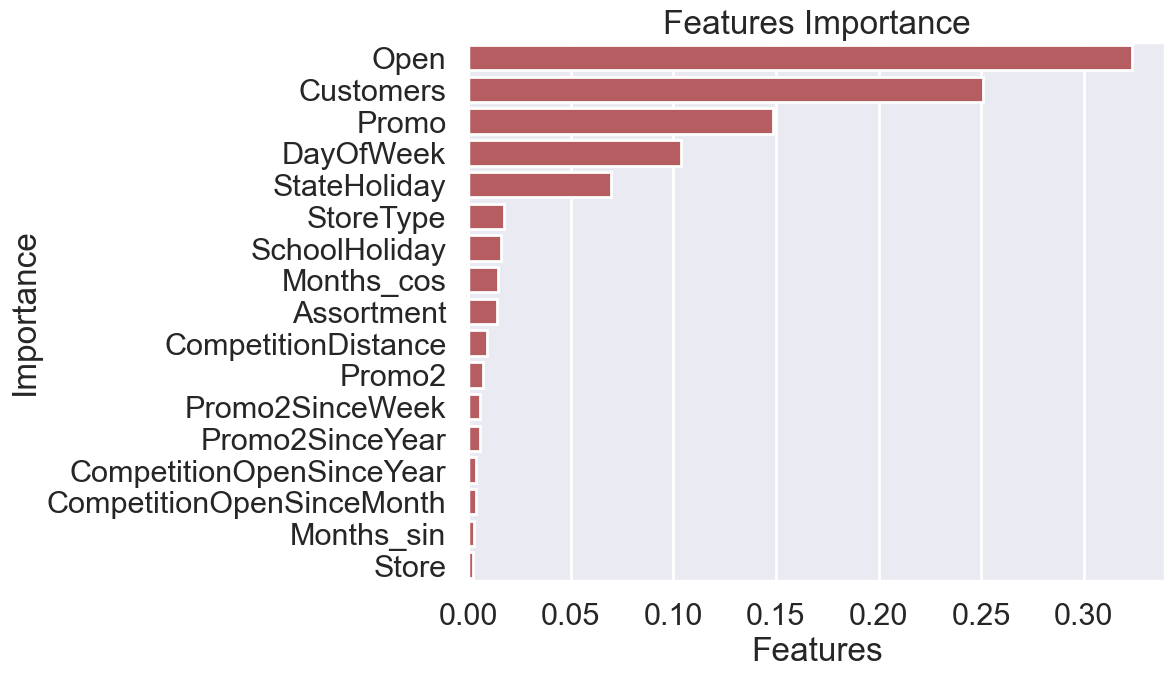

In [150]:
plt.figure(figsize=(9,7))
sns.barplot(y="Feature Names",x="Importance", data=feature_imp, color='r')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

# List of Mean Squared Error and r2 Scores

In [151]:
results = pd.DataFrame({
    'Algorithms' : ['Linear Regression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor'],
    'r2 Score' : [r2_LinearRegression, r2_DecisionTreeRegressor, r2_RandomForestRegressor, r2_XGBRegressor],
    'Mean Square Error' : [mse_LinearRegression, mse_pred_DecisionTreeRegressor, mse_RandomForestRegressor, mse_XGBRegressor]
})
results

,Algorithms,r2 Score,Mean Square Error
0,Linear Regression,0.848148,1.962127e+06
1,DecisionTreeRegressor,0.971920,4.167050e+05
2,RandomForestRegressor,0.983191,2.458025e+05
3,XGBRegressor,0.911117,1.122904e+06
